In [1]:
!pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16,7)

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual 

In [3]:
# Import the data
data = pd.read_csv("finance_data.csv")

# Change the name of the column inside the Data
data.columns = ["SNo", "Date" , "StartupName" , "IndustryVertical" , "SubVertical" , "city" ,
                  "InvestorsName" , "InvestmentType" , "AmountInUSD" , "Remarks"]

# Lets clean the string
def clean_string(x):
    return str(x).replace("\\xc2\\xa0" , "").replace("\\\\xc2\\\\xa0", "")

# Lets apply the function to clean the data
for col in ["StartupName" , "IndustryVertical" , "SubVertical" , "city" ,
                  "InvestorsName" , "InvestmentType" , "AmountInUSD" , "Remarks"]:
    data[col] = data[col].apply(lambda x: clean_string(x))
    
# Lets check the head of the data
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,city,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,9/1/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,9/1/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,2/1/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,2/1/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [4]:
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'city',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks'],
      dtype='object')

In [5]:
# Lets check the size of the data
print("Size of the data is:",data.shape)

Size of the data is: (3044, 10)


# Data Cleaning

In [6]:
# Missing data

# lets import warnings odules
import warnings
warnings.filterwarnings('ignore')

# lets calculate the total missing values in the data
total = data.isnull().sum().sort_values(ascending = False)

# Lets check the percentage the missing values in the data
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)

# Lets store the above two values in a dataset called missing data
missing_data = pd.concat([total, percent], axis=1 , keys=['Total' , 'Percent %'])

# Lets check the head of the data
missing_data

,Total,Percent %
Remarks,0,0.0
AmountInUSD,0,0.0
InvestmentType,0,0.0
InvestorsName,0,0.0
city,0,0.0
SubVertical,0,0.0
IndustryVertical,0,0.0
StartupName,0,0.0
Date,0,0.0
SNo,0,0.0


In [7]:
# Lets checkthe values in remark column
data['Remarks'].value_counts()

nan                                                         2625
Series A                                                     177
Series B                                                      64
Pre-Series A                                                  37
Series C                                                      28
                                                            ... 
Series E (Updated from 315M to 400M after Press Release)       1
Pre-Series A Bridge                                            1
Strategic Funding, Minority stake                              1
thru Accelerator                                               1
Series E                                                       1
Name: Remarks, Length: 70, dtype: int64

In [8]:
# Lets remove remark column, as it containts a lot of nans, and high cardinal column
data = data.drop(['Remarks'], axis = 1)

# Lets check the column names after removing the remarks column, as it having
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'city',
       'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

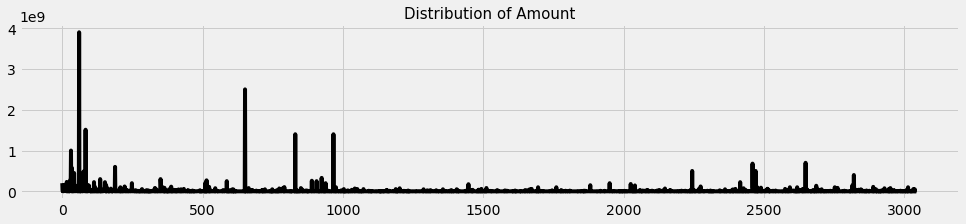

In [9]:
# Lets convert the amount column into numerical, so that we can analyze the value inside it

# Function to clean the AmountInUSD column
def clean_amount(x):
    x = ''.join([c for c in str(x) if  c in ['0','1','2','3','4','5','6','7','8','9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

# Lets apply the function on the column
data["AmountInUSD"] = data["AmountInUSD"].apply(lambda x: float(clean_amount(x)))

# Lets check the head of the column after cleaning it
plt.rcParams['figure.figsize'] = (15,3)
data['AmountInUSD'].plot(kind = 'line', color = 'black')
plt.title('Distribution of Amount' , fontsize = 15)
plt.show()

In [10]:
## Cleaning the dates
data['Date'][data['Date'] == '12/05.2015'] = '12/05/2015'
data['Date'][data['Date'] == '13/04.2015'] = '13/04/2015'
data['Date'][data['Date'] == '15/01.2015'] = '15/01/2015'
data['Date'][data['Date'] == '22/01//2015'] = '22/01/2015'
data['Date'][data['Date'] == '05/072018'] = '05/07/2018'
data['Date'][data['Date'] == '01/07/015'] = '01/07/2015'
data['Date'][data['Date'] == '\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

# how does the funding ecosytem changes with respect to time

Number of funding per month in decreasing order (top 10)
 201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


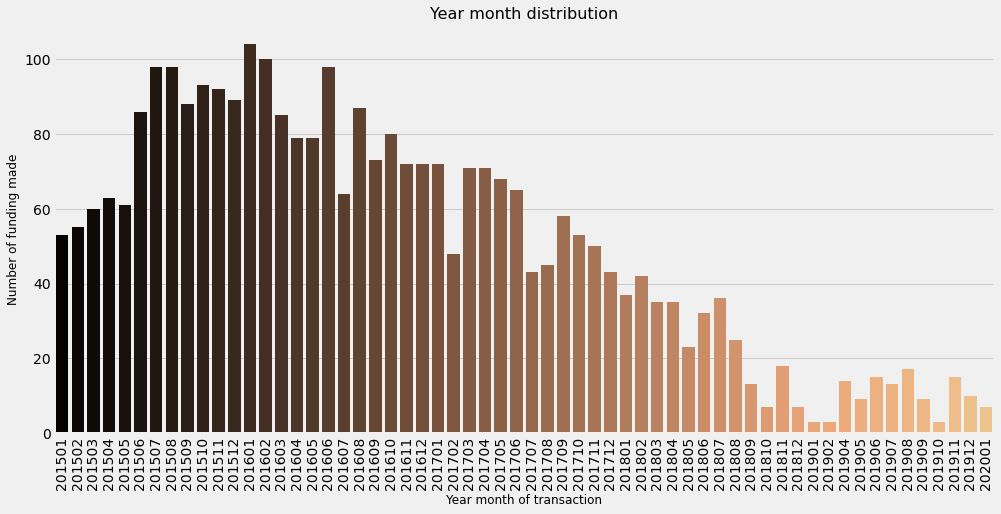

In [11]:
# Some of data formats are witten wrongly so we have to clean them and analyzing these values

#Converting into date time object
data["yearmonth"] = (pd.to_datetime(data['Date'],
                                   format = '%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)
temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order (top 10)\n",temp)
year_month = data['yearmonth'].value_counts()
                                                                      
                                                                      
                                                                      
# lets plot the data
plt.rcParams['figure.figsize'] = (15,7) 
sns.barplot(year_month.index, year_month.values, palette = 'copper')
plt.xticks(rotation = 90)
plt.xlabel('Year month of transaction' , fontsize = 12)
plt.ylabel('Number of funding made' , fontsize = 12)
plt.title('Year month distribution' , fontsize = 16)
plt.show()                                                                      

# what is the general amount that startups get in india

In [12]:
# Lets check the maximum funding of the startups
print("Maximum funding to the startups is: ",data["AmountInUSD"].dropna().sort_values().max())

Maximum funding to the startups is:  3900000000.0


In [13]:
# LEts check the startsups tha tare more than 50 Crore + funding
@interact
def check(column = 'AmountInUSD' , x = 500000000): 
    return data[data[column] > x].sort_values (by = 'AmountInUSD', ascending = False)

interactive(children=(Text(value='AmountInUSD', description='column'), IntSlider(value=500000000, description=…

In [14]:
# Lets checkout different ventures of paytm
data[data.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,city,InvestorsName,InvestmentType,AmountInUSD,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,-9.990000e+02,201503
2948,2949,5/2/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,201502


In [15]:
# lets check the minimum funding in startup
print("Minimum funding is startups is :",data['AmountInUSD'].dropna().sort_values().min())

Minimum funding is startups is : -999.0


In [16]:
# lets check the start up with least funding
data[['AmountInUSD' , 'StartupName' ]] .sort_values(by = 'AmountInUSD' , ascending = True).head(5)

,AmountInUSD,StartupName
2125,-999.0,Splitkart
1464,-999.0,TAC Security
708,-999.0,FableStreet
709,-999.0,Monsoon Fintech
710,-999.0,MonkeyBox


In [17]:
# lets check the number of startups with no funding
data[data['AmountInUSD'] == -999.0].shape

(971, 10)

In [18]:
# Average funding
print("On Average indian startups got funding of :", data["AmountInUSD"].dropna().sort_values().mean())

On Average indian startups got funding of : 13270058.261169514


Total startups funded : 2457
Ola Cabs         8
Swiggy           8
Paytm            7
Medinfi          6
Meesho           6
NoBroker         6
Nykaa            6
UrbanClap        6
Jugnoo           5
Capital Float    5
Name: StartupName, dtype: int64


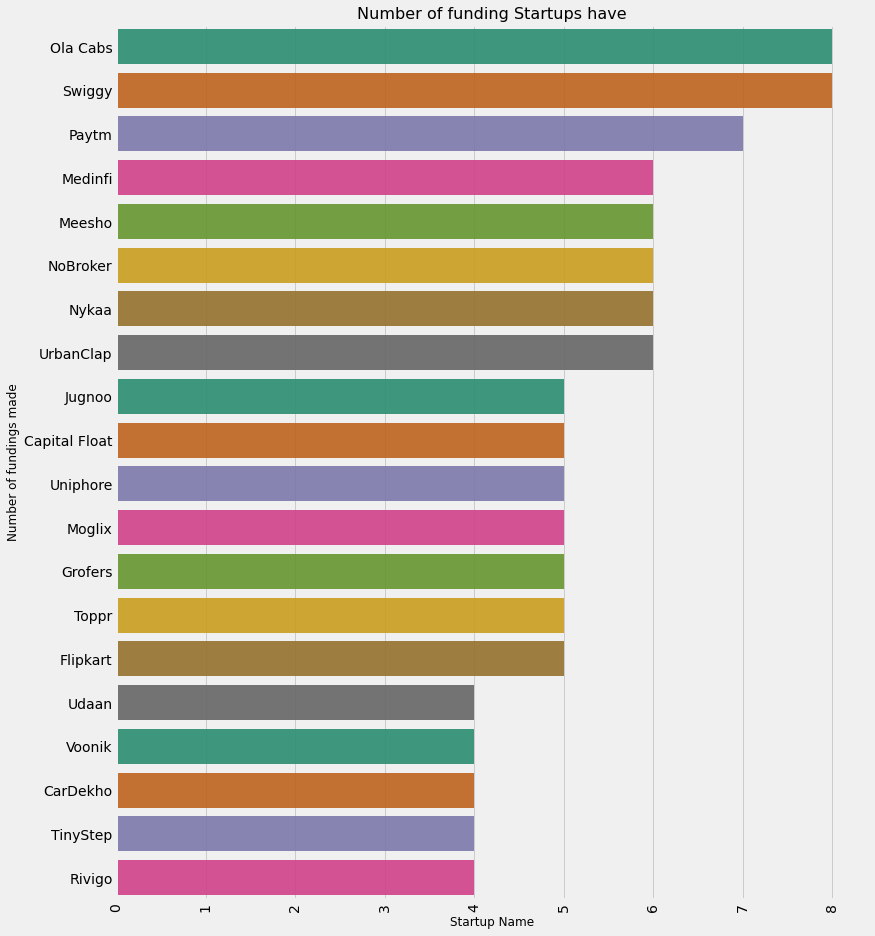

In [19]:
# lets check the number of funding of each startups
print("Total startups funded :" ,len(data["StartupName"].unique()))
print(data["StartupName"].value_counts().head(10))
startupname = data['StartupName'].value_counts().head(20)


# lets plot the data
plt.rcParams['figure.figsize'] = (12,15)
sns.barplot(y = startupname.index , x = startupname.values, alpha = 0.9, palette = 'Dark2')
plt.xticks(rotation = 'vertical')
plt.xlabel('Startup Name' , fontsize = 12)
plt.ylabel('Number of fundings made'  , fontsize = 12)
plt.title('Number of funding Startups have' , fontsize = 16)
plt.show()

# which kind of industry ae ore preferred for startups ?

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: IndustryVertical, dtype: int64


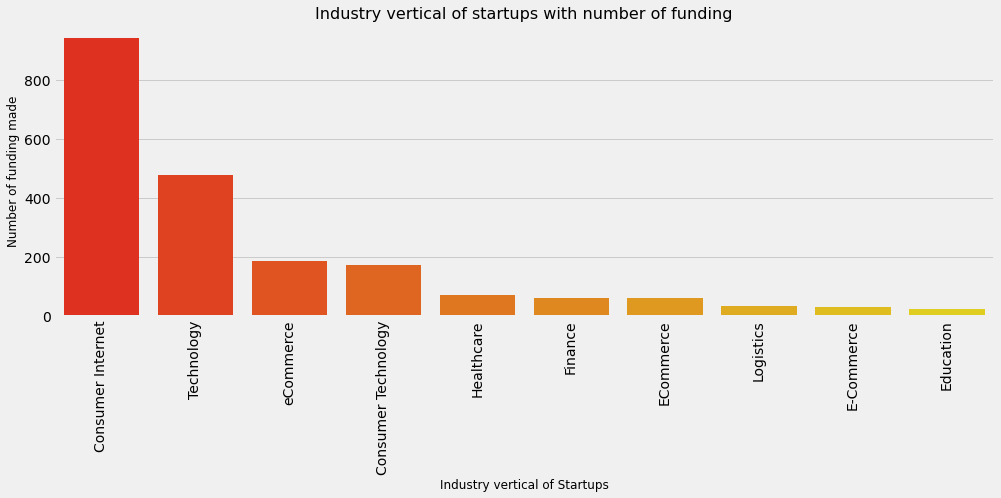

In [20]:
# lets analyze the industry for startups

# data cleaning
data['IndustryVertical'] = data['IndustryVertical'].replace('nan' , 'Consumer Technology')

industry = data['IndustryVertical'].value_counts().head(10)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15,5)
sns.barplot(industry.index , industry.values , palette= 'autumn')
plt.xticks(rotation = 'vertical')
plt.xlabel('Industry vertical of Startups' , fontsize = 12)
plt.ylabel('Number of funding made' , fontsize = 12)
plt.title('Industry vertical of startups with number of funding' , fontsize = 16)
plt.show()

Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Education                                         5
Online Learning Platform                          5
Online lending platform                           5
Online Lending                                    5
Online Education Platform                         5
Online Food Delivery                              4
Non-Banking Financial Company                     4
SaaS                                              3
Fitness Mobile App                                3
Online Insurance Aggregator                       3
Agri-tech                                         3
Online learning platform                          3
ECommerce Marketplace                             3
Online Payment Gateway                            3
Online platform for Higher Education Services     3
Data Analytics platform                           3
Online Food 

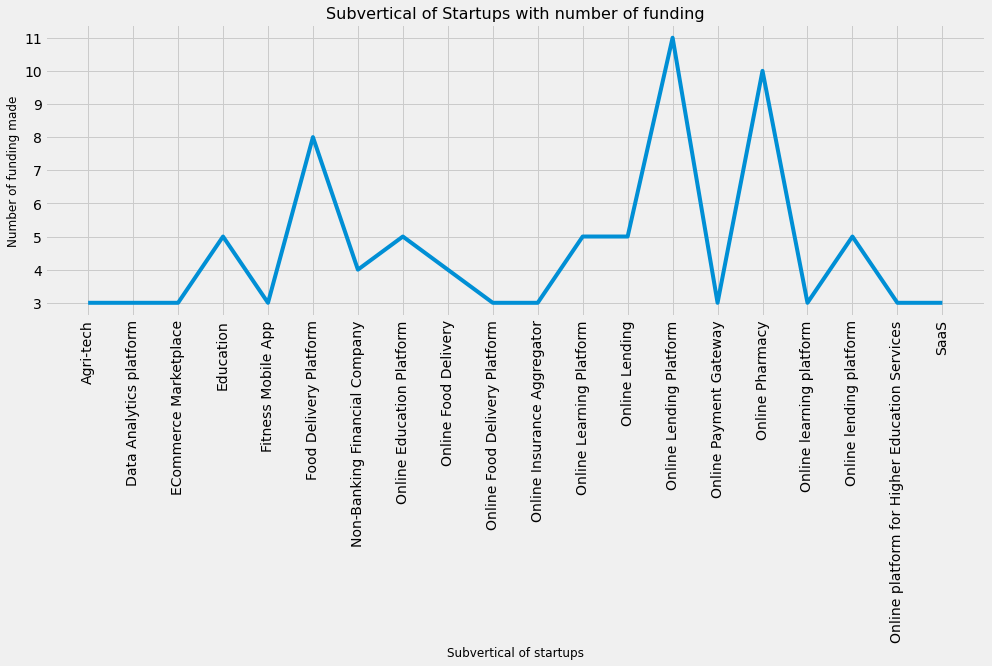

In [21]:
# lets ananlyze the sub vertical industries
industry = data['SubVertical'].value_counts()[1:].head(20)
print(industry)

# lets plot the data
sns.lineplot(industry.index , industry.values , palette='winter')
plt.xticks(rotation = 'vertical')
plt.xlabel('Subvertical of startups', fontsize = 12)
plt.ylabel('Number of funding made' , fontsize = 12)
plt.title('Subvertical of Startups with number of funding' , fontsize = 16)
plt.show()

# Does Location also pay a role in determining the growth of Startups ? 

Bangalore    1022
Mumbai        568
New Delhi     424
Gurgaon       291
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Gurugram       50
Ahmedabad      38
Name: city, dtype: int64


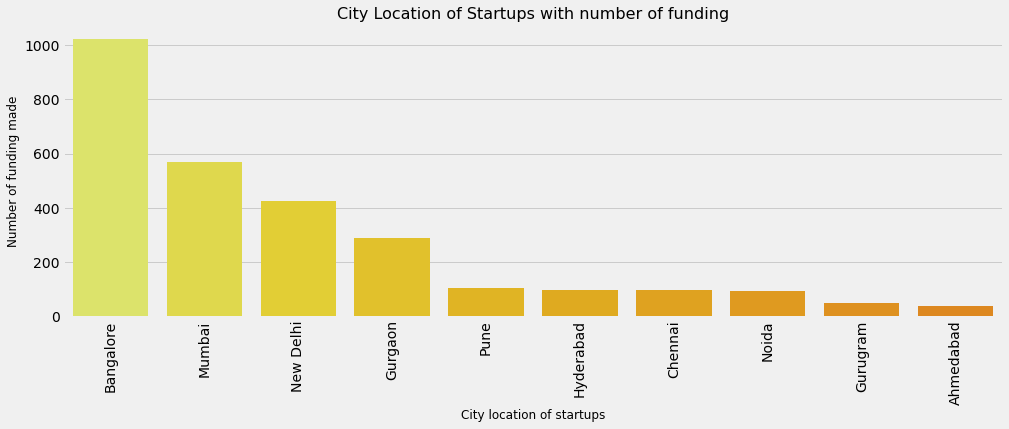

In [22]:
# lets analyze the effect of cities on startup

# Lets clean the data fo better analysis
data['city'] = data['city'].replace(('Bengaluru' , 'nan'),('Bangalore' , 'Bangalore'))

city = data['city'].value_counts().head(10)
print(city)

# lets plo the data
sns.barplot(city.index , city.values , palette = 'Wistia')
plt.xticks(rotation = 'vertical')
plt.xlabel('City location of startups' , fontsize = 12)
plt.ylabel('Number of funding made' , fontsize = 12)
plt.title("City Location of Startups with number of funding" , fontsize = 16)
plt.show()






# Who plays the main role in indian Startups Ecosystem ?

In [23]:
# lets install wordcloud 
! pip install WordCloud

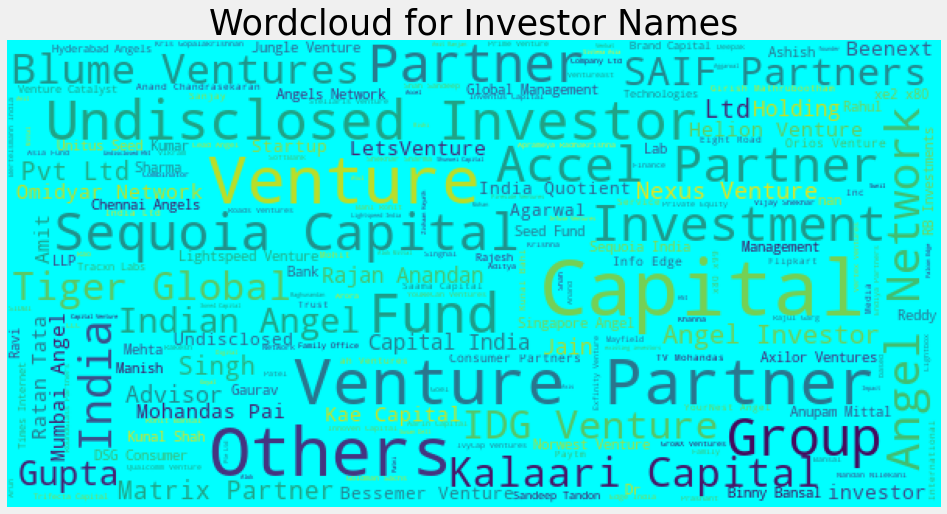

In [24]:
from wordcloud import WordCloud

names = data["InvestorsName"][~pd.isnull(data["InvestorsName"])]
wordcloud = WordCloud(max_font_size = 50 , width = 600 , height = 300 , background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names" , fontsize = 35)
plt.axis("off")
plt.show()

Undisclosed Investors       136
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Group of Angel Investors     15
Sequoia Capital              15
Accel Partners               12
Brand Capital                11
Venture Catalysts            11
RoundGlass Partners          10
Name: InvestorsName, dtype: int64


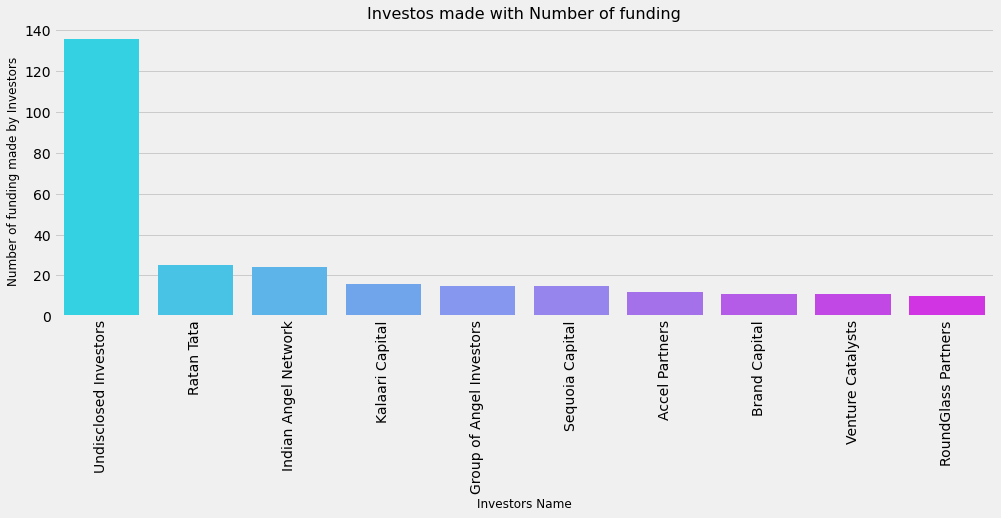

In [25]:
# lets analyze the investors on startups

# lets clean the data
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'nan'] = 'Undisclosed Investors'

# lets check the values counts
investors = data['InvestorsName'].value_counts().head(10)
print(investors)

# lets plot the data
sns.barplot(investors.index , investors.values , palette= 'cool')
plt.xticks(rotation = 'vertical')
plt.xlabel('Investors Name' , fontsize = 12)
plt.ylabel('Number of funding made by Investors' , fontsize = 12)
plt.title("Investos made with Number of funding" , fontsize = 16)
plt.show()

# What are the different Types of Funding for Startups ?

Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentType, dtype: int64


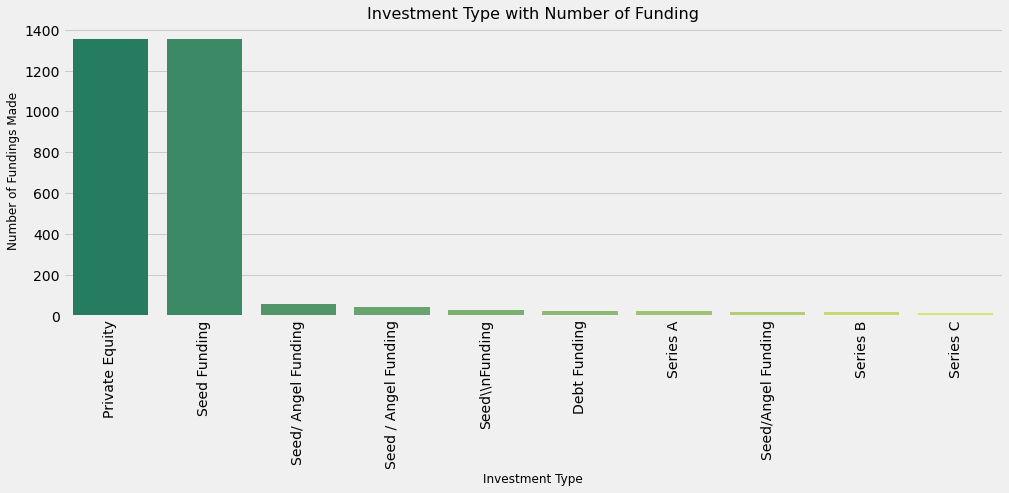

In [26]:
# lets analyze the Investment
investment = data['InvestmentType'].value_counts().head(10)
print(investment)

# lets clean the dataset
data['InvestmentType'][data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
data['InvestmentType'][data['InvestmentType'] == 'Crowd Funding'] = 'Crowd Funding'
data['InvestmentType'][data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'
data['InvestmentType'][data['InvestmentType'] == 'Seed/ Angel Funding'] = 'Seed Angel Funding'
data['InvestmentType'][data['InvestmentType'] == 'Seed/Angel Funding'] = 'Seed Angel Funding'
data['InvestmentType'][data['InvestmentType'] == 'Seed / Angel Funding'] = 'Seed Angel Funding'
data['InvestmentType'][data['InvestmentType'] == 'Angel / Seed Funding'] = 'Seed Angel Funding'

# lets plot the data
sns.barplot(investment.index , investment.values , palette= 'summer')
plt.xticks(rotation = 'vertical')
plt.xlabel('Investment Type', fontsize = 12)
plt.ylabel('Number of Fundings Made', fontsize = 12)
plt.title("Investment Type with Number of Funding", fontsize = 16)
plt.show()